[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 2, 1, 6, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,

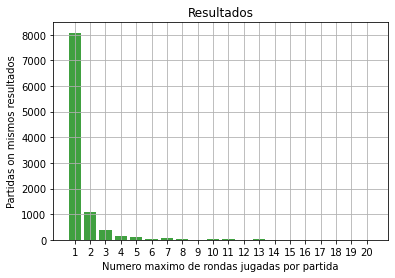

Desviación típica: 0.8161597111916378
Valor esperado: 1.405


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import random, math

# Datos
n = 80
r = 17.6
h = n/(2*r)


def distancia_al_centro(i, j, n):
    x = int(j)*(1/h)
    y = int(i)*(1/h)
    centerx, centery = ((n-1)/2)*(1/h), ((n-1)/2)*(1/h) 
    return np.sqrt((x-centerx)**2+(y-centery)**2)

#Se crea el tablero
Tablero = np.empty((n,n))

#Se crea la diana como un conjuto de 0's
for i in range(len(Tablero)):
    for j in range(len(Tablero[0])):
        if distancia_al_centro(i, j, n) <= 17.5:
            Tablero[i,j] = 0    #El punto está en la diana
        else:
            Tablero[i,j] = None     #El punto no está en el tablero

print(Tablero)
#Empezamos a jugar
juegos = 10000
Resultados = []

#Creamos una clase dardo
class Dardo():
    
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y

    def distancia(self): #Distancia al centro
        return distancia_al_centro(self.x, self.y, n)

    def inDiana(self, r): #Esta o no dentro de una diana
        if distancia_al_centro(self.x, self.y, n) <= r: return True
        else: return False 
    
    def show_coordinates(self): #Dar las coordenadas
        return (self.x, self.y) 


for juego in range(1, juegos+1):
    num_rondas = 1 #Numero de rondas ganadas por juego (asumimos ronda uno ganada)
    #Segundo dardo
    x, y = random.randint(0, n-1), random.randint(0, n-1)
    random.seed(juego)
    dart = Dardo(x, y)
    while dart.inDiana(r/(num_rondas+1)) or (Tablero[dart.show_coordinates()] == None):
        #Mientras ganemos las rondas o se jueguen rondas invalidas
        if not Tablero[dart.show_coordinates()] == None:
            num_rondas += 1 #Ronda ganada
        else:
            x, y = random.randint(0, n-1), random.randint(0, n-1)
            dart = Dardo(x, y) #Lanzamos un nuevo dardo
    Resultados.append(num_rondas)

#Agrupamos cantidades en un diccionario según juego
print(Resultados)

Histograma_data = {}
for num_rondas in range(1,21): #Maximo de rondas posibles por juego
    Histograma_data[str(num_rondas)] = Resultados.count(num_rondas) #Contamos cantidad de veces que se juegan x rondas de max
print(Histograma_data)

# Dibujamos histograma
plt.bar(list(Histograma_data.keys()), height=list(Histograma_data.values()), facecolor='g', alpha=0.75)
plt.xlabel('Numero maximo de rondas jugadas por partida')
plt.ylabel('Partidas on mismos resultados')
plt.title('Resultados')
plt.grid(True)
plt.savefig("dardos3")
plt.show()

#Calcular media ponderada
val_esp = 0
for ronda in range(0, 20):
  val_esp += (list(Histograma_data.values())[ronda]/len(Resultados)) * (ronda+1) 

chi2 = 0
for ronda, frec_ronda in zip(range(1, 21) ,Histograma_data.values()):
  chi2 += (frec_ronda/len(Resultados)) * ronda **2

desvacion = math.sqrt(chi2 - val_esp**2) 

desv = 0
for el in Histograma_data.values():
  desv += (el - val_esp)**2
N = len(Resultados)
desv = math.sqrt(desv/(N*(N-1)))

print("Desviación típica: {}\nValor esperado: {}".format(desv, val_esp))

Expieza juego
Expieza juego
Se gana juego x 70 y 32
Expieza juego
Expieza juego
Expieza juego
Se gana juego x 3 y 53
Expieza juego
Se gana juego x 25 y 29
Se gana juego x 77 y 57
Expieza juego
Se gana juego x 37 y 41
Se gana juego x 45 y 48
Expieza juego
Expieza juego
Se gana juego x 33 y 72
Se gana juego x 6 y 52
Expieza juego
Se gana juego x 33 y 18
Se gana juego x 14 y 64
Expieza juego
Expieza juego
Se gana juego x 8 y 0
Expieza juego
Se gana juego x 56 y 79
Expieza juego
Se gana juego x 45 y 71
Expieza juego
Se gana juego x 30 y 14
Se gana juego x 63 y 43
Se gana juego x 78 y 1
Expieza juego
Expieza juego
Expieza juego
Se gana juego x 76 y 76
Expieza juego
Se gana juego x 41 y 51
Expieza juego
Se gana juego x 8 y 27
Expieza juego
Expieza juego
Expieza juego
Expieza juego
Se gana juego x 64 y 26
Se gana juego x 4 y 20
Expieza juego
Expieza juego
Expieza juego
Se gana juego x 58 y 32
Se gana juego x 29 y 35
Se gana juego x 55 y 35
Expieza juego
Expieza juego
Se gana juego x 16 y 25
S

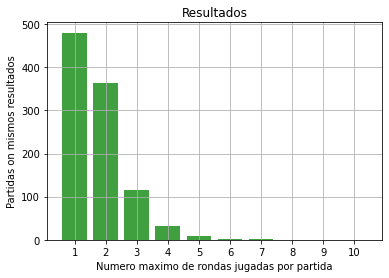

{'1': 480, '2': 363, '3': 115, '4': 31, '5': 8, '6': 2, '7': 1, '8': 0, '9': 0, '10': 0}
Desviación típica: 0.6110314451703668
Valor esperado: 1.7339999999999998


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import random, math

# Datos
n = 80
r = 17.6
h = n/(2*r)

def distancia_al_centro(i, j, n):
    x = int(j)*(1/h)
    y = int(i)*(1/h)
    centerx, centery = ((n-1)/2)*(1/h), ((n-1)/2)*(1/h) 
    return np.sqrt((x-centerx)**2+(y-centery)**2)

#Se crea el tablero
Tablero = np.empty((n,n))

#Se crea la diana como un conjuto de 0's
for i in range(len(Tablero)):
    for j in range(len(Tablero[0])):
        if distancia_al_centro(i, j, n) <= 17.5:
            Tablero[i,j] = 0    #El punto está en la diana
        else:
            Tablero[i,j] = None     #El punto no está en el tablero

#Empezamos a jugar
juegos = 1000
Resultados = []

#Creamos una clase dardo
class Dardo():
    
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y

    def distancia(self): #Distancia al centro
        return distancia_al_centro(self.x, self.y, n)

    def inDiana(self, r): #Esta o no dentro de una diana
        if distancia_al_centro(self.x, self.y, n) <= r: return True
        else: return False 
    
    def show_coordinates(self): #Dar las coordenadas
        return (self.x, self.y) 

for juego in range(juegos): #Contamos pra varios juegos
    num_rondas = 0 #Numero de rondas jugadas sin perder
    print("Expieza juego")
    x, y = random.randint(0, n-1), random.randint(0, n-1) #Ojo, no incluir n
    dart = Dardo(x, y)
    num_rondas += 1 #Asumimos que la primera ronda se gana
    #Segundo dardo
    x, y = random.randint(0, n-1), random.randint(0, n-1) #Ojo, no incluir n
    dart1 = Dardo(x, y)
    while dart1.inDiana(dart.distancia()) or (Tablero[dart.show_coordinates()] == None):
        #Mientras se ganen las rondas o se jueguen rondas inválidas
        if Tablero[dart.show_coordinates()] != None:
            num_rondas += 1 #Ronda ganada
            dart = Dardo(x, y) #dart = dart1, no se actualizan coordenadas
            x, y = random.randint(0, n-1), random.randint(0, n-1) #Jugamos otra vez
            dart1 = Dardo(x, y)
            print("Se gana juego", "x", x, "y", y)
        else:
            dart = Dardo(x, y) #dart = dart1, no se actualizan coordenadas
            x, y = random.randint(0, n-1), random.randint(0, n-1) #Jugamos otra vez
            dart1 = Dardo(x, y)
    Resultados.append(num_rondas)

print(Resultados)

#Agrupamos cantidades en un diccionario según juego

Histograma_data = {}
for num_rondas in range(1, np.max(Resultados)+4): #Maximo de rondas posibles por juego
    Histograma_data[str(num_rondas)] = Resultados.count(num_rondas) #Contamos cantidad de veces que se juegan x rondas de max

# Dibujamos histograma
plt.bar(list(Histograma_data.keys()), height=list(Histograma_data.values()), facecolor='g', alpha=0.75)
plt.xlabel('Numero maximo de rondas jugadas por partida')
plt.ylabel('Partidas on mismos resultados')
plt.title('Resultados')
plt.grid(True)
plt.savefig("Dardos2")
plt.show()

print(Histograma_data)

#Calcular media ponderada
val_esp = 0
for ronda in range(0, len(list(Histograma_data.keys()))):
  val_esp += (list(Histograma_data.values())[ronda]/len(Resultados)) * (ronda+1) 

chi2 = 0
for ronda, frec_ronda in zip(range(1, len(list(Histograma_data.keys()))+1) ,Histograma_data.values()):
  chi2 += (frec_ronda/len(Resultados)) * ronda **2

desvacion = math.sqrt(chi2 - val_esp**2) 

desv = 0
for el in Histograma_data.values():
  desv += (el - val_esp)**2
N = len(Resultados)
desv = math.sqrt(desv/(N*(N-1)))

print("Desviación típica: {}\nValor esperado: {}".format(desv, val_esp))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import random, math

# Datos
n = 500
r = 17.6
h = r/(n-1)

def distancia_al_centro(i, j, n):
    x = int(j)*(1/h)
    y = int(i)*(1/h)
    centerx, centery = ((n-1)/2)*(1/h), ((n-1)/2)*(1/h) 
    return np.sqrt((x-centerx)**2+(y-centery)**2)

def pos(i, j):
    x = int(j)*(1/h)
    y = int(i)*(1/h)
    centerx, centery = ((n-1)/2)*(1/h), ((n-1)/2)*(1/h) 
    return x-centerx, y-centery

#Se crea el tablero
Tablero = np.empty((n,n))

#Se crea la diana como un conjuto de 0's
for i in range(len(Tablero)):
    for j in range(len(Tablero[0])):
        if distancia_al_centro(i, j, n) <= 17.5:
            Tablero[i,j] = 0    #El punto está en la diana
        else:
            Tablero[i,j] = None     #El punto no está en el tablero

#Empezamos a jugar
juegos = 10
Resultados = []

#Creamos una clase dardo
class Dardo():
    
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y

    def distancia(self): #Distancia al centro
        return distancia_al_centro(self.x, self. n)

    def inDiana(self, r): #Esta o no dentro de una diana
        if distancia_al_centro(self.x, self.y, n) <= r: return True
        else: return False 
    
    def show_coordinates(self): #Dar las coordenadas
        return (self.x, self.y)

    #Añadimos una nuevo metodo para calcular el angulo
    #y otro para verificar su sector en la circumferencia

    def calcular_angulo(self): #Calcula el angulo del dardo respecto al eje horizontal polar
        x_coor, y_coor = pos(self.x, self.y)
        if x_coor > 0:
            return math.atan(y_coor/x_coor)
        if x_coor < 0 and y_coor >= 0:
            return math.atan(y_coor/x_coor) + np.pi
        if x_coor < 0 and y_coor < 0:
            return math.atan(y_coor/x_coor) - np.pi
        if x_coor == 0 and y_coor > 0: return np.pi/2
        if x_coor == 0 and y_coor < 0: return -np.pi/2
        if x_coor == 0 and y_coor == 0: return 0
    
    def inSeccion(self, num_secs, secciones):
        arg_dardo = self.calcular_angulo()
        arg_seccion = 2*np.pi/secciones
        for num_sec in num_secs:
          print("Función", arg_dardo, arg_seccion, num_sec)
          if arg_dardo < arg_seccion*(num_sec + 1) and num_sec*arg_seccion < arg_dardo:
            return True
        else: return False

    def Seccion(self, secciones):
        arg_dardo = self.calcular_angulo()
        arg_seccion = 2*np.pi/secciones
        print("Funcion 2", arg_dardo, arg_seccion)
        for seccion in range(0, secciones):
          if arg_dardo < arg_seccion*(seccion + 1) and seccion*arg_seccion < arg_dardo:
            return seccion



for juego in range(1, juegos+1):
    secciones = []
    num_rondas = 0 #Numero de rondas ganadas por juego
    x, y = random.randint(0, n-1), random.randint(0, n-1)
    random.seed(juego)
    dart = Dardo(x, y)
    secciones.append(dart.Seccion(20))
    x, y = random.randint(0, n-1), random.randint(0, n-1)
    dart = Dardo(x, y)
    while (not dart.inSeccion(secciones, 20)) or (Tablero[dart.show_coordinates()] == None):
        random.seed(juego)
        #Mientras ganemos las rondas o se jueguen rondas invalidas
        if not Tablero[dart.show_coordinates()] == None:
            num_rondas += 1 #Ronda ganada
            x, y = random.randint(0, n-1), random.randint(0, n-1)
            dart = Dardo(x, y) #Lanzamos un nuevo dardo
            secciones.append(dart.Seccion(20))
            print("Secciones", secciones)
        else:
            x, y = random.randint(0, n-1), random.randint(0, n-1)
            dart = Dardo(x, y) #Lanzamos un nuevo dardo
            secciones.append(dart.Seccion(20))
        print(Resultados)
    Resultados.append(num_rondas)

print(Resultados)

#Agrupamos cantidades en un diccionario según juego

Histograma_data = {}
for num_rondas in range(1, np.max(Resultados)): #Maximo de rondas posibles por juego
    Histograma_data[str(num_rondas)] = Resultados.count(num_rondas) #Contamos cantidad de veces que se juegan x rondas de max

# Dibujamos histograma
plt.bar(list(Histograma_data.keys()), height=list(Histograma_data.values()), facecolor='g', alpha=0.75)
plt.xlabel('Numero maximo de rondas jugadas por partida')
plt.ylabel('Cantidad de veces a las que se llega a una ronda maxima dada')
plt.title('Resultados')
plt.grid(True)
plt.savefig("Dardos2")
plt.show()

print(Histograma_data)

#Calcular media ponderada
val_esp = 0
for ronda in range(0, len(list(Histograma_data.keys()))):
  val_esp += (list(Histograma_data.values())[ronda]/len(Resultados)) * (ronda+1) 

chi2 = 0
for ronda, frec_ronda in zip(range(1, len(list(Histograma_data.keys()))+1) ,Histograma_data.values()):
  chi2 += (frec_ronda/len(Resultados)) * ronda **2

desvacion = math.sqrt(chi2 - val_esp**2) 

desv = 0
for el in Histograma_data.values():
  desv += (el - val_esp)**2
N = len(Resultados)
desv = math.sqrt(desv/(N*(N-1)))

print("Desviación típica: {}\nValor esperado: {}".format(desv, val_esp))



Funcion 2 0.8521592656235115 0.3141592653589793
Función -1.3460103584701533 0.3141592653589793 2
Funcion 2 -1.3460103584701533 0.3141592653589793
Secciones [2, None]
[]
Función -1.3460103584701533 0.3141592653589793 2
Función -1.3460103584701533 0.3141592653589793 None


TypeError: ignored